In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import os
import pandas as pd

In [2]:
df = pd.read_csv('./육군신체측정정보.csv', encoding='cp949')

C:\Users\admin\anaconda3\envs\tfenv\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [73]:
df = pd.read_csv('./육군신체측정정보.csv', encoding='cp949', header=None)

C:\Users\admin\anaconda3\envs\tfenv\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head()

,순번,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
0,1,20140106,96.3,92.6,185.5,82.5,83.8,57.1,28.5,73.2
1,2,2013,101.9,83.8,167.2,81.2,74.4,55.0,24.2,65.1
2,3,20140106,99.5,89.6,179.9,99.2,84.2,56.3,28.1,93.2
3,4,2013,98.6,85.5,171.4,85.9,76.4,54.5,27.4,71.6
4,5,20140106,94.7,88.1,176.9,78.3,79.7,58.5,26.5,67.1


In [4]:
df.tail()

,순번,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
167975,167979,20170131,100.6,86.4,173.2,86.7 (34.1 in),77.1,56.9,27.1,73.7
167976,167980,20170131,97.9,82.7,166.3,90.5 (35.6 in),73.4,61.5,28.8,70.7
167977,167981,20170131,97.9,87.2,175.2,94.3 (37.1 in),83.1,57.1,27.6,78.7
167978,167982,20170131,85.3,86.8,173.6,75.9 (29.9 in),76.6,57.6,24.3,57.4
167979,167983,20170131,86.6,88.3,175.8,73.0 (28.7 in),77.8,56.3,26.1,51.7


In [5]:
df['허리 둘레 센티미터'] = df['허리 둘레 센티미터'].astype('string')

In [6]:
df['허리 둘레 센티미터'] = df['허리 둘레 센티미터']+"("

In [7]:
df['허리 둘레 센티미터'] = df['허리 둘레 센티미터'].str.split("(")

In [8]:
df['허리 둘레 센티미터']

0                    [82.5, ]
1                    [81.2, ]
2                    [99.2, ]
3                    [85.9, ]
4                    [78.3, ]
                 ...         
167975    [86.7 , 34.1 in), ]
167976    [90.5 , 35.6 in), ]
167977    [94.3 , 37.1 in), ]
167978    [75.9 , 29.9 in), ]
167979    [73.0 , 28.7 in), ]
Name: 허리 둘레 센티미터, Length: 167980, dtype: object

In [9]:
data = []
for i in range(len(df['허리 둘레 센티미터'])):
    row = df['허리 둘레 센티미터'][i]
    data.append(row[0])

In [10]:
data

['82.5',
 '81.2',
 '99.2',
 '85.9',
 '78.3',
 '118.4',
 '93.6',
 '71.1',
 '82.9',
 '118.4',
 '112.6',
 '95.4',
 '75.7',
 '81.7',
 '87.3',
 '89.6',
 '85.8',
 '75.4',
 '79.7',
 '72.2',
 '81.7',
 '91.4',
 '97.3',
 '86.6',
 '105.2',
 '84.2',
 '89.3',
 '81.6',
 '76.3',
 '69.5',
 '80.8',
 '93.6',
 '86.3',
 '81.2',
 '96.3',
 '86.2',
 '84.3',
 '84.7',
 '88.6',
 '81.1',
 '82.9',
 '82.1',
 '95.6',
 '85.9',
 '80.8',
 '95.0',
 '112.6',
 '75.0',
 '67.1',
 '114.7',
 '82.9',
 '80.7',
 '89.4',
 '98.5',
 '72.1',
 '82.1',
 '94.2',
 '88.3',
 '74.9',
 '87.7',
 '78.1',
 '95.5',
 '88.0',
 '97.5',
 '116.5',
 '83.3',
 '110.8',
 '79.1',
 '76.5',
 '73.1',
 '87.0',
 '82.9',
 '85.8',
 '85.9',
 '112.4',
 '77.9',
 '101.3',
 '116.3',
 '81.4',
 '91.4',
 '85.8',
 '77.8',
 '81.8',
 '77.9',
 '87.9',
 '84.1',
 '78.2',
 '76.7',
 '74.9',
 '84.6',
 '69.4',
 '66.4',
 '75.4',
 '79.5',
 '79.5',
 '82.5',
 '105.1',
 '85.2',
 '63.9',
 '97.8',
 '87.1',
 '100.2',
 '87.3',
 '103.8',
 '106.4',
 '89.0',
 '75.7',
 '76.6',
 '68.7',
 '81

In [11]:
df['허리 둘레 센티'] = data

In [12]:
df.head()

,순번,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램,허리 둘레 센티
0,1,20140106,96.3,92.6,185.5,"[82.5, ]",83.8,57.1,28.5,73.2,82.5
1,2,2013,101.9,83.8,167.2,"[81.2, ]",74.4,55.0,24.2,65.1,81.2
2,3,20140106,99.5,89.6,179.9,"[99.2, ]",84.2,56.3,28.1,93.2,99.2
3,4,2013,98.6,85.5,171.4,"[85.9, ]",76.4,54.5,27.4,71.6,85.9
4,5,20140106,94.7,88.1,176.9,"[78.3, ]",79.7,58.5,26.5,67.1,78.3


In [13]:
df = df.drop(['허리 둘레 센티미터'], axis=1)

In [14]:
df

,순번,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램,허리 둘레 센티
0,1,20140106,96.3,92.6,185.5,83.8,57.1,28.5,73.2,82.5
1,2,2013,101.9,83.8,167.2,74.4,55.0,24.2,65.1,81.2
2,3,20140106,99.5,89.6,179.9,84.2,56.3,28.1,93.2,99.2
3,4,2013,98.6,85.5,171.4,76.4,54.5,27.4,71.6,85.9
4,5,20140106,94.7,88.1,176.9,79.7,58.5,26.5,67.1,78.3
...,...,...,...,...,...,...,...,...,...,...
167975,167979,20170131,100.6,86.4,173.2,77.1,56.9,27.1,73.7,86.7
167976,167980,20170131,97.9,82.7,166.3,73.4,61.5,28.8,70.7,90.5
167977,167981,20170131,97.9,87.2,175.2,83.1,57.1,27.6,78.7,94.3
167978,167982,20170131,85.3,86.8,173.6,76.6,57.6,24.3,57.4,75.9


In [15]:
# 선택하여 열 이름 변경하기
df.columns

Index(['순번', '측정 일자', '가슴 둘레 센티미터', '소매길이 센티미터', '신장 센티미터', '샅높이 센티미터',
       '머리 둘레 센티미터', '발 길이 센티미터', '몸무게 킬로그램', '허리 둘레 센티'],
      dtype='object')

In [16]:
df_num_drop = df.drop(['순번'], axis=1)

In [17]:
df_date_drop = df.drop(['측정 일자', '순번'],  axis=1)

In [18]:
df_date_drop.columns

Index(['가슴 둘레 센티미터', '소매길이 센티미터', '신장 센티미터', '샅높이 센티미터', '머리 둘레 센티미터',
       '발 길이 센티미터', '몸무게 킬로그램', '허리 둘레 센티'],
      dtype='object')

In [19]:
df_date_drop = df_date_drop.rename(columns={'가슴 둘레 센티미터':'chest', '소매길이 센티미터':'arm',
                            '신장 센티미터':'height', '샅높이 센티미터':'sat','머리 둘레 센티미터':'head',
                            '발 길이 센티미터':'feet','몸무게 킬로그램':'weight','허리 둘레 센티':'waist'})

In [20]:
df_date_drop.columns

Index(['chest', 'arm', 'height', 'sat', 'head', 'feet', 'weight', 'waist'], dtype='object')

In [21]:
df_date_drop.head()

,chest,arm,height,sat,head,feet,weight,waist
0,96.3,92.6,185.5,83.8,57.1,28.5,73.2,82.5
1,101.9,83.8,167.2,74.4,55.0,24.2,65.1,81.2
2,99.5,89.6,179.9,84.2,56.3,28.1,93.2,99.2
3,98.6,85.5,171.4,76.4,54.5,27.4,71.6,85.9
4,94.7,88.1,176.9,79.7,58.5,26.5,67.1,78.3


In [22]:
X = df_date_drop.drop(['weight'], axis=1)
y = df_date_drop['weight']

In [23]:
#array로 변환 
X = np.asarray(X).astype('float32')
y = np.asarray(y).astype('float32')

In [24]:
#노멀라이즈 
X = X/np.max(X)
y = y/np.max(y)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [27]:
#모델을 스스로 만드는 부분이 조금 약하네 
model = keras.Sequential([keras.layers.Dense(7), 
                          keras.layers.Dense(256, activation='relu'),
                         keras.layers.Dense(256, activation='relu'),
                         keras.layers.Dense(256, activation='relu'),
                         keras.layers.Dense(256, activation='relu'),
                         keras.layers.Dense(256, activation='relu'),
                         keras.layers.Dense(1, activation='sigmoid')])

In [28]:
model.compile(loss='mse', optimizer = 'Adam', metrics=['mae'])

In [29]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(x_train, y_train, epochs=50,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stop])

Epoch 1/50
3675/3675 [==============================] - 7s 2ms/step - loss: 0.0024 - mae: 0.0350 - val_loss: 0.0024 - val_mae: 0.0385
Epoch 2/50
3675/3675 [==============================] - 7s 2ms/step - loss: 0.0016 - mae: 0.0297 - val_loss: 0.0014 - val_mae: 0.0269
Epoch 3/50
3675/3675 [==============================] - 7s 2ms/step - loss: 0.0015 - mae: 0.0291 - val_loss: 0.0016 - val_mae: 0.0293
Epoch 4/50
3675/3675 [==============================] - 7s 2ms/step - loss: 0.0015 - mae: 0.0285 - val_loss: 0.0014 - val_mae: 0.0273
Epoch 5/50
3675/3675 [==============================] - 7s 2ms/step - loss: 0.0015 - mae: 0.0285 - val_loss: 0.0014 - val_mae: 0.0274
Epoch 6/50
3675/3675 [==============================] - 7s 2ms/step - loss: 0.0014 - mae: 0.0282 - val_loss: 0.0015 - val_mae: 0.0293
Epoch 7/50
3675/3675 [==============================] - 7s 2ms/step - loss: 0.0014 - mae: 0.0281 - val_loss: 0.0014 - val_mae: 0.0282
Epoch 8/50
3675/3675 [==============================] - 7s 2ms

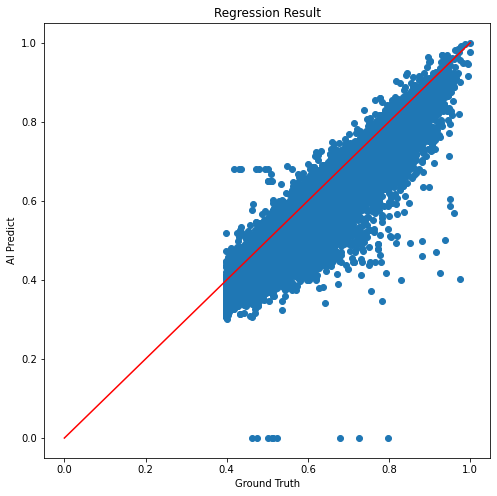

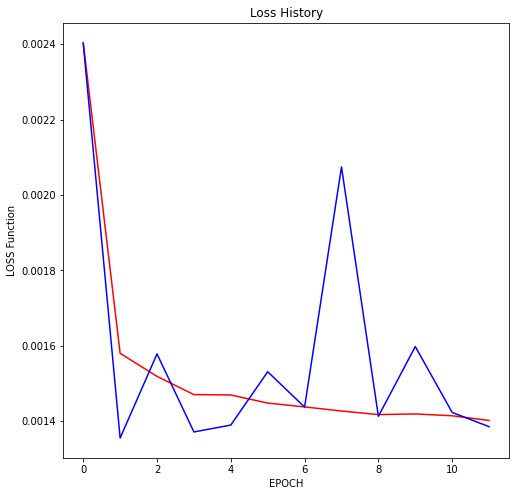

In [30]:
#MSE = 2.7 
#정확도 97.3 

import matplotlib.pyplot as plt

prediction = model(x_test)


X = prediction / np.max(prediction, axis=0)
Y = y_test / np.max(y_test, axis=0)

minval = min(np.min(X), np.min(Y))
maxval = max(np.max(X), np.max(Y))

fig = plt.figure(figsize=(8, 8))
plt.title("Regression Result")
plt.xlabel("Ground Truth")
plt.ylabel("AI Predict")
plt.scatter(X, Y)
plt.plot([minval, maxval], [minval, maxval], "red")
fig.savefig("result.png")

train_history = history.history["loss"]
validation_history = history.history["val_loss"]
fig = plt.figure(figsize=(8, 8))
plt.title("Loss History")
plt.xlabel("EPOCH")
plt.ylabel("LOSS Function")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
fig.savefig("train_history.png")

In [31]:
model.evaluate(x_test, y_test)

1575/1575 [==============================] - 2s 995us/step - loss: 0.0014 - mae: 0.0276


[0.001385164330713451, 0.027567986398935318]

In [35]:
model.compile(optimizer='rmsprop', loss='mse', metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [49]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(x_train, y_train, epochs=5,
                    validation_data=(x_test, y_test),batch_size=50,
                    callbacks=[early_stop])

Epoch 1/5
2352/2352 [==============================] - 5s 2ms/step - loss: 0.0014 - mean_absolute_error: 0.0283 - val_loss: 0.0014 - val_mean_absolute_error: 0.0279
Epoch 2/5
2352/2352 [==============================] - 5s 2ms/step - loss: 0.0014 - mean_absolute_error: 0.0283 - val_loss: 0.0013 - val_mean_absolute_error: 0.0268
Epoch 3/5
2352/2352 [==============================] - 5s 2ms/step - loss: 0.0014 - mean_absolute_error: 0.0283 - val_loss: 0.0013 - val_mean_absolute_error: 0.0263
Epoch 4/5
2352/2352 [==============================] - 5s 2ms/step - loss: 0.0014 - mean_absolute_error: 0.0281 - val_loss: 0.0013 - val_mean_absolute_error: 0.0260
Epoch 5/5
2352/2352 [==============================] - 5s 2ms/step - loss: 0.0014 - mean_absolute_error: 0.0281 - val_loss: 0.0012 - val_mean_absolute_error: 0.0260


In [50]:
mae_history = history.history['val_mean_absolute_error']

In [51]:
all_mae_histories = []
all_mae_histories.append(mae_history)

In [52]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(5)]

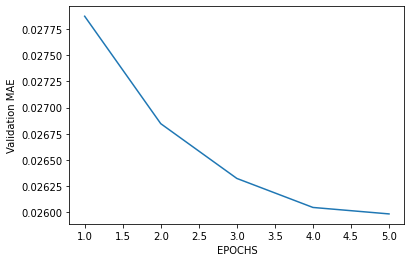

In [53]:
plt.plot(range(1,len(average_mae_history)+1), average_mae_history)
plt.xlabel('EPOCHS')
plt.ylabel('Validation MAE')
plt.show()

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 7)                 56        
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2048      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 2